In [121]:
import pandas as pd
import uproot
import numpy as np
import cmath
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import moments
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["font.family"] = "serif"
plt.rcParams["text.usetex"] = True
obsList = ['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9', 'M1s', 'M2s', 'M1c', 'M2c', 'S1s', 'S2s', 'S1c', 'S2c']
optObsList = ['FL', 'P1', 'P2', 'P3', 'P4p', 'P5p', 'P6p', 'P8p']
optimisedObsTranslator = {'FL' : 'FL', 'S3' : 'P1', 'S4' : 'P4p', 'S5' : 'P5p', 'AFB' : 'P2', 'S7' : 'P6p', 'S8' : 'P8p', 'S9' : 'P3', 'S1s' : 'S1s', 'S2s' : 'S2s', 'S1c' : 'S1c', 'S2c' : 'S2c', 'M1s' : 'M1s', 'M2s' : 'M2s', 'M1c' : 'M1c', 'M2c' : 'M2c'}
obs_to_label = {'FL' : '$F_{L}$', 'S3' : '$S_{3}$', 'S4' : '$S_{4}$', 'S5' : '$S_{5}$', 'AFB' : '$A_{FB}$', 'S7' : '$S_{7}$', 'S8' : '$S_{8}$', 'S9' : '$S_{9}$',
                'M1s' : '$M_{1}^{s}$', 'M2s' : '$M_{2}^{s}$', 'M1c' : '$M_{1}^{c}$', 'M2c' : '$M_{2}^{c}$', 'S1s' : '$S_{1}^{s}$', 'S2s' : '$S_{2}^{s}$', 'S1c' : '$S_{1}^{c}$', 'S2c' : '$S_{2}^{c}$',
                'P1' : '$P_{1}$', 'P2' : '$P_{2}$', 'P3' : '$P_{3}$', 'P4p' : '$P_{4}^{\prime}$', 'P5p' : '$P_{5}^{\prime}$', 'P6p' : '$P_{6}^{\prime}$', 'P8p' : '$P_{8}^{\prime}$'}

In [94]:
import importlib
importlib.reload(moments)
infile = uproot.open('dataset_bin_10.root')['DecayTree'].arrays(library = 'pd')
infile = moments.calculateAllMoments(infile)
infile

,mB,ctl,ctk,phi,mkpi,eff,weight,year,pol,id,...,moment_S1c,moment_S2s,moment_S2c,moment_S3,moment_S5,moment_S4,moment_AFB,moment_S7,moment_S8,moment_S9
0,5318.354991,0.712818,-0.464523,0.744754,0.934793,1.0,1.0,2012,-1.0,1,...,0.069844,0.629553,0.051717,0.097883,-1.060639,-1.890107,1.048135,-0.977744,-1.742385,1.201487
1,5289.679551,0.649161,0.210310,-0.616172,0.846195,1.0,1.0,2012,-1.0,1,...,-0.604981,0.458912,-0.257245,0.573782,0.638165,1.035680,1.163341,-0.451914,-0.733413,-1.630084
2,5271.917755,-0.710999,0.134758,0.307270,0.884438,1.0,1.0,2012,1.0,1,...,-0.801825,0.939235,-0.587071,1.239602,0.447492,-0.795416,-1.308914,0.141998,-0.252402,0.874786
3,5289.803886,0.517817,0.022051,1.384437,0.883554,1.0,1.0,2012,-1.0,1,...,-0.583745,-0.366449,0.243903,-2.129017,0.017472,0.022618,0.970434,0.092666,0.119960,0.832432
4,5289.774478,-0.968172,0.013809,2.883934,0.940119,1.0,1.0,2012,1.0,1,...,-1.420342,3.396558,-2.262932,0.170303,-0.016708,0.040441,-1.814977,0.004403,-0.010657,-0.096453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227494,5235.557285,-0.495650,-0.951960,-1.471301,0.922105,1.0,1.0,2017,1.0,-1,...,1.967149,0.251673,-1.160826,-0.216687,-0.125746,0.155815,-0.087147,1.259664,-1.560882,-0.043697
227495,5241.477211,-0.741198,0.190027,-1.021674,0.888284,1.0,1.0,2017,-1.0,-1,...,-0.767592,1.142090,-0.663878,-0.617813,0.326834,-0.605621,-1.339561,-0.534131,0.989741,-1.208604
227496,5269.359187,0.651689,0.330444,-1.712795,0.883375,1.0,1.0,2017,1.0,-1,...,-0.354542,0.420398,-0.155560,-1.537357,-0.167391,-0.272717,1.088491,-1.170886,-1.907632,0.448735
227497,5277.830395,-0.342272,0.483532,-1.224398,0.879260,1.0,1.0,2017,-1.0,-1,...,0.067004,-0.742179,-0.137019,-1.626541,0.675094,-0.577664,-0.491714,-1.870314,1.600388,-1.350109


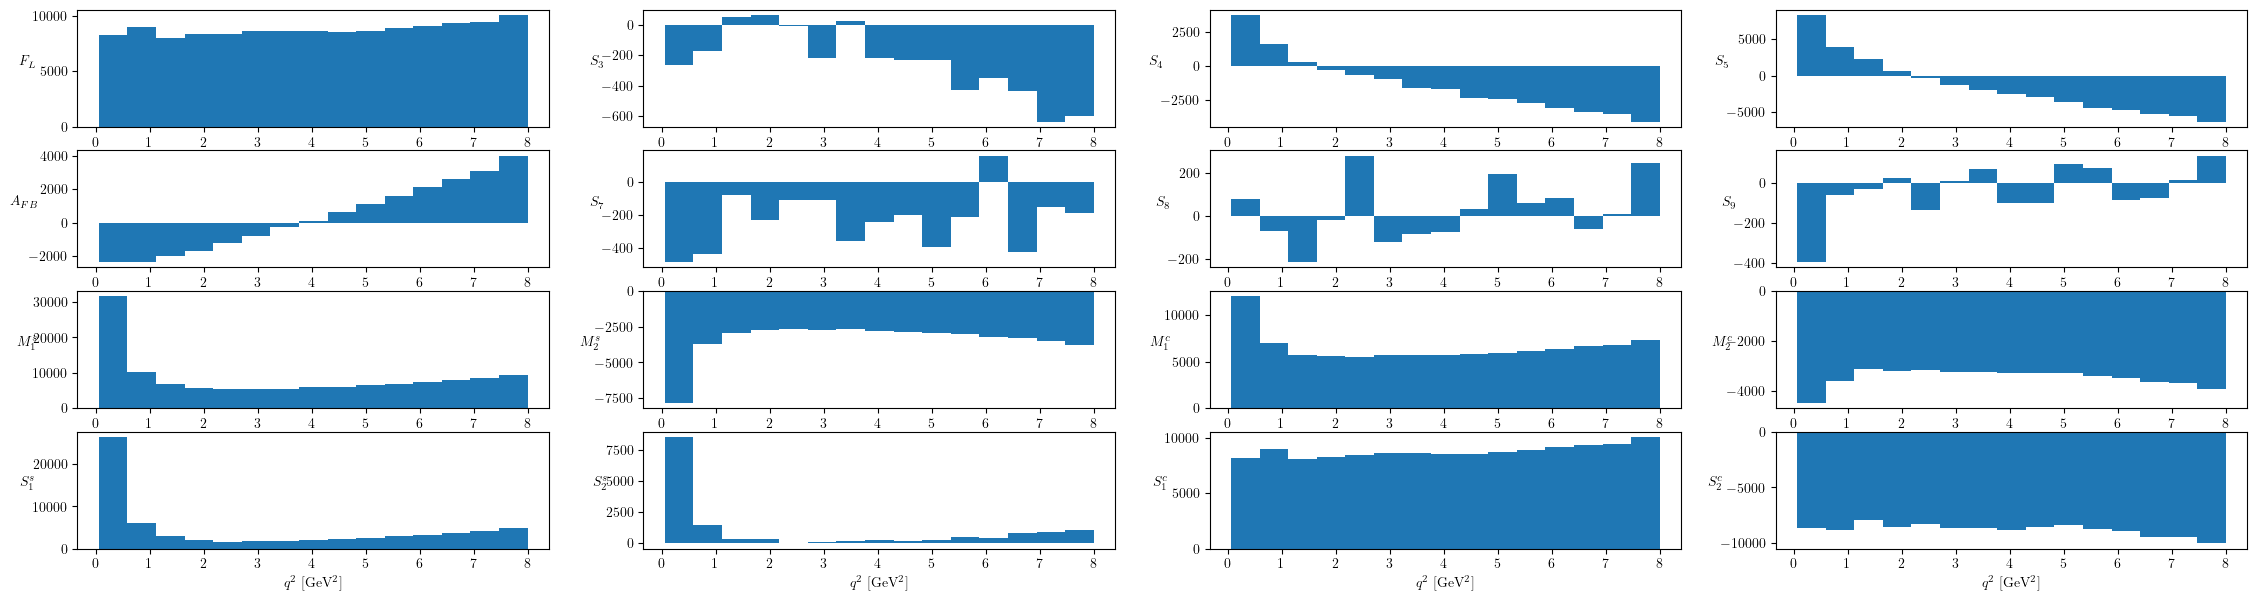

In [96]:
mom_bins = {}
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (28,7))
_i = 0
for _row in ax:
    for _col in _row:
        mom_bins[obsList[_i]] = _col.hist(infile['q2'], weights = infile['moment_%s' % obsList[_i]], bins = 15)
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

Text(0.5, 0, '$q^{2}$ [GeV$^{2}$]')

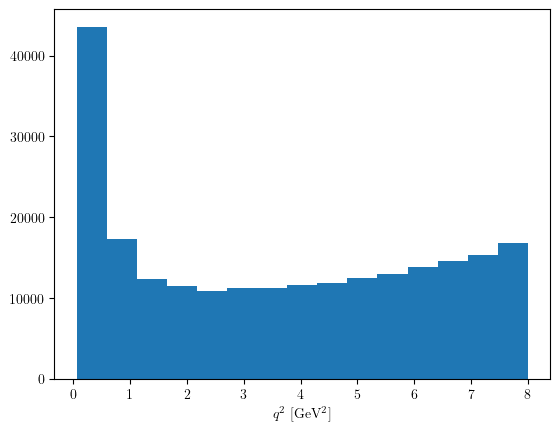

In [97]:
plt.figure()
r_bins = plt.hist(infile['q2'], bins = 15)
plt.xlabel("$q^{2}$ [GeV$^{2}$]")

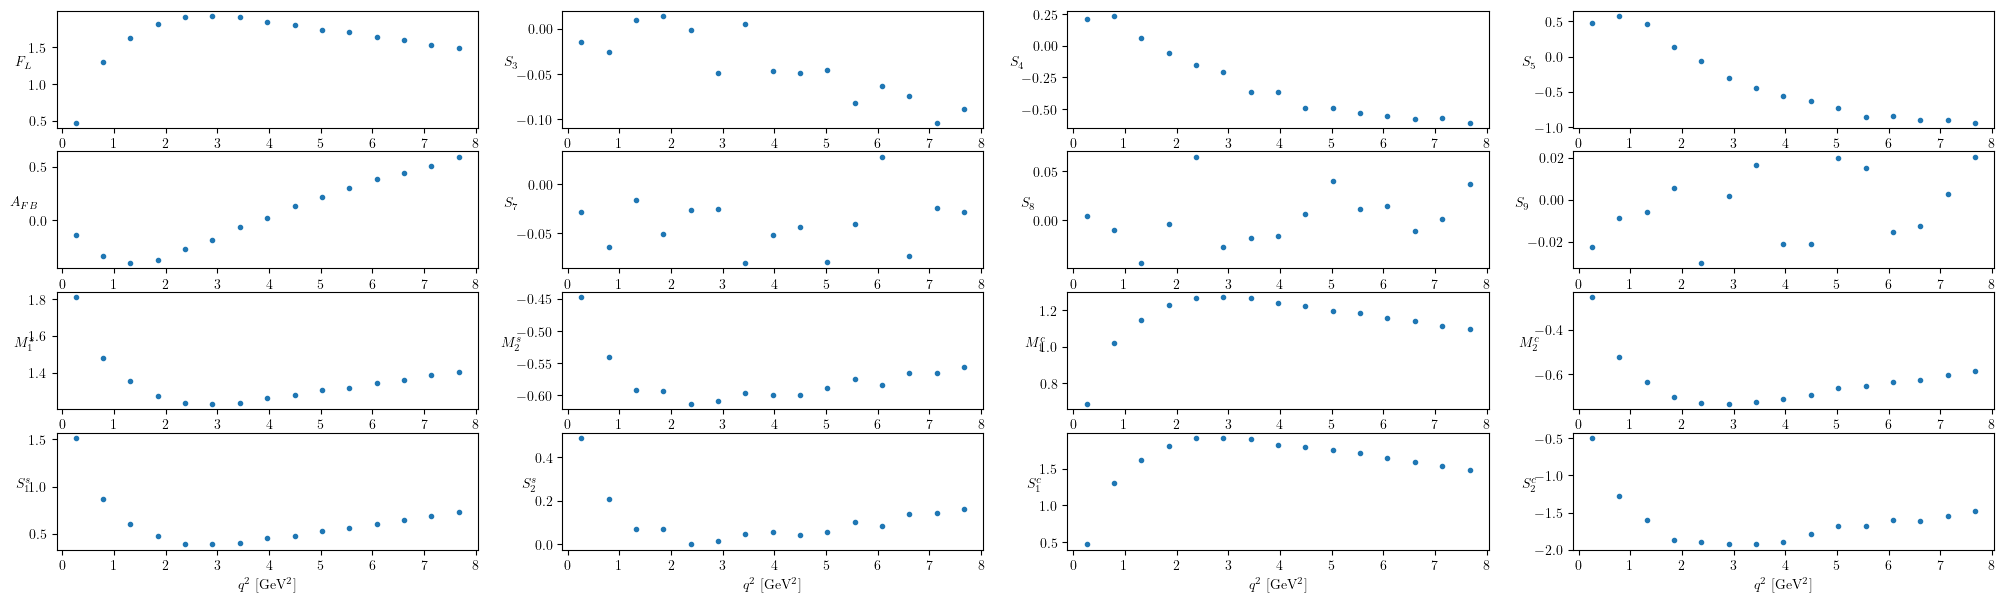

In [98]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _col.plot(r_bins[1][0:15]+0.2, (5/2) * mom_bins[obsList[_i]][0]/r_bins[0], '.')
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

In [99]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process.kernels import RBF
from sklearn import neighbors
from scipy.ndimage.filters import gaussian_filter1d
from scipy.interpolate import interp1d 

In [100]:
#kernel = DotProduct() + WhiteKernel()
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

In [101]:
n_neighbours = 800
knn = neighbors.KNeighborsRegressor(n_neighbours, weights="uniform")
#gpr = GaussianProcessRegressor(kernel=kernel,
#         random_state=0).fit(np.array(infile['q2'][:1000]).reshape(1000,1), infile['moment_5'][:1000])


In [102]:
#mean_prediction, std_prediction = gpr.predict(np.array(infile['q2'][:1000]).reshape(1000,1), return_std=True)
T = np.linspace(0.06,8.0,10000)[:, np.newaxis]
unbins = {}
for _s in range(200):
    unbins[_s] = {}
    tsample = infile.sample(30000)
    for _obs in obsList:
        unbins[_s][_obs] = knn.fit(np.array(tsample['q2']).reshape(30000,1), tsample['moment_%s' % _obs][:30000]).predict(T)

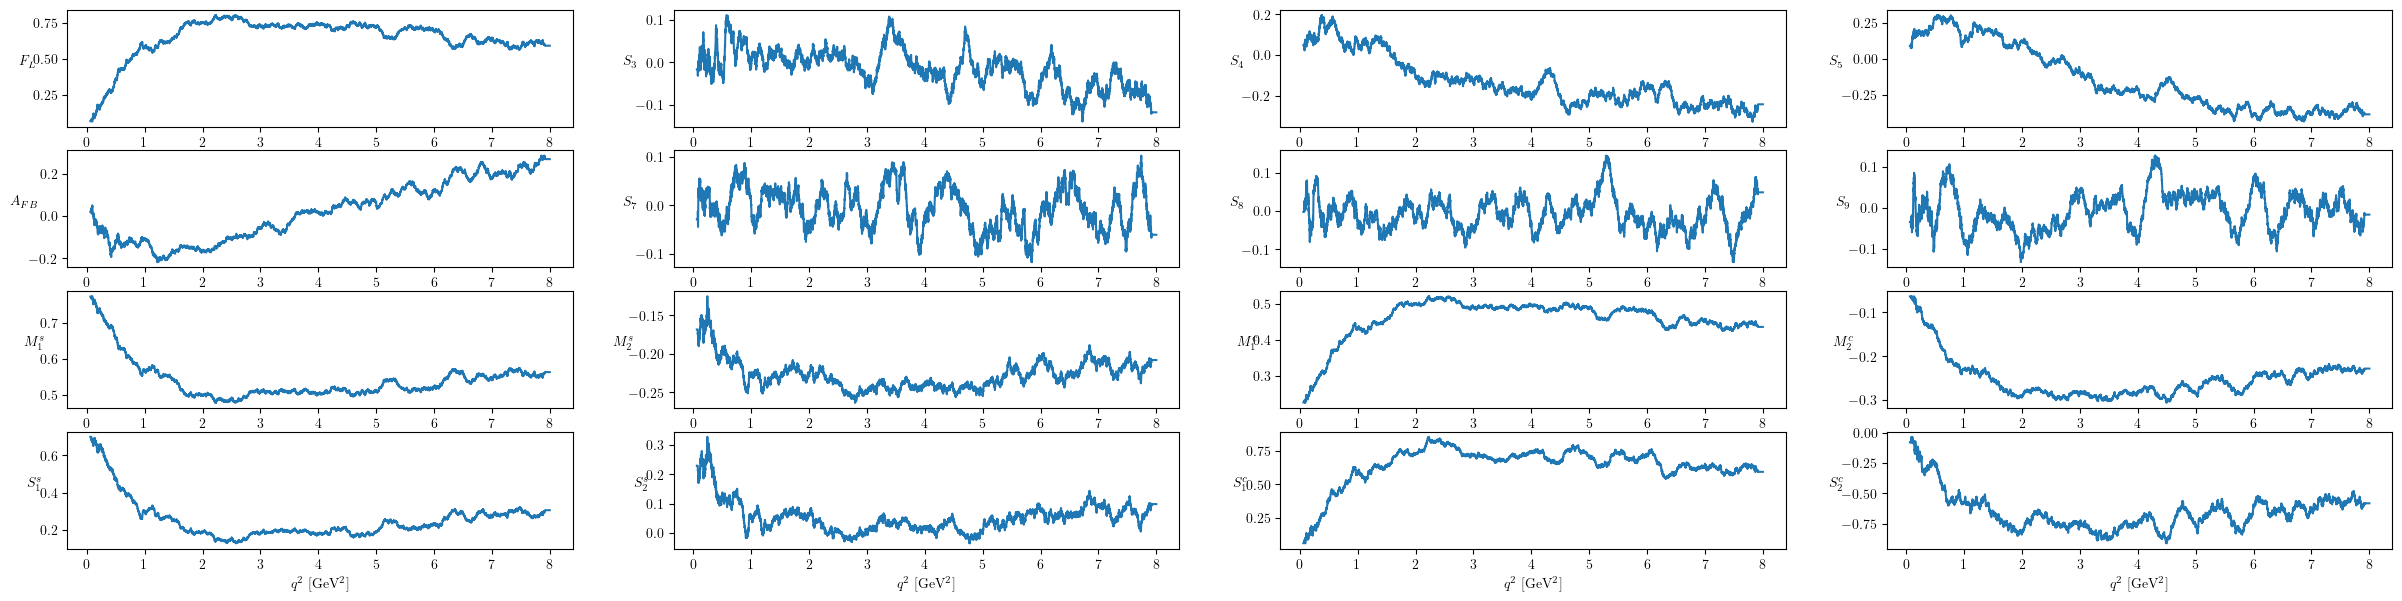

In [103]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (30,7))
_i = 0
for _row in ax:
    for _col in _row:
        _col.plot(T, unbins[0][obsList[_i]])
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

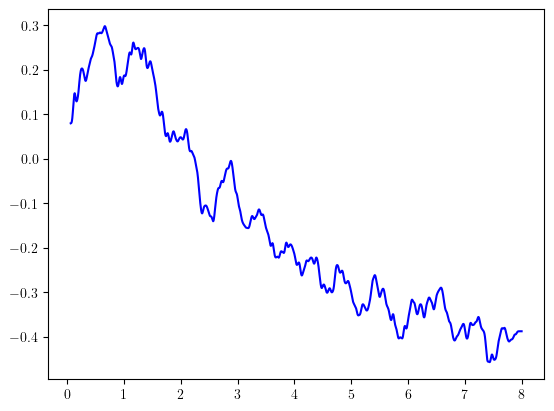

In [104]:
plt.plot(T, gaussian_filter1d(unbins[80]['S5'], sigma=20), color='b')

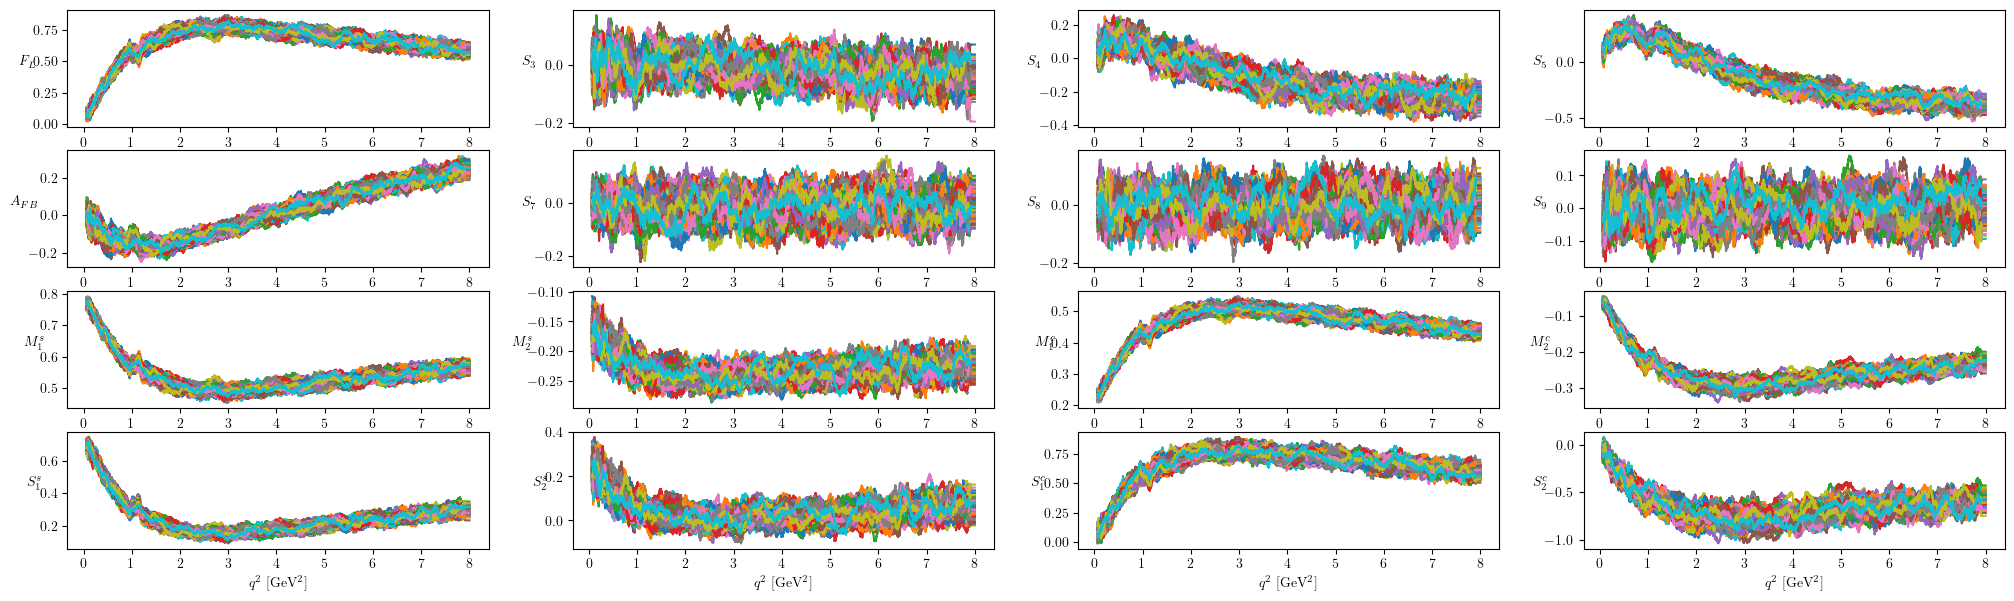

In [105]:
filtered_unbins = {}
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        filtered_unbins[_obs] = {}
        for _s in range(200):
            filtered_unbins[_obs][_s] = gaussian_filter1d(unbins[_s][_obs], sigma=20)
            _col.plot(T, unbins[_s][_obs])
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

In [128]:
import importlib
importlib.reload(moments)
mean_vals = {}
lower_vals = {}
upper_vals = {}
sigma_vals = {}
p_mean_vals = {}
p_lower_vals = {}
p_upper_vals = {}
p_sigma_vals = {}
for _obs in obsList:
    p_obs = optimisedObsTranslator[_obs]
    mean_vals[_obs] = []
    lower_vals[_obs] = []
    upper_vals[_obs] = []
    sigma_vals[_obs] = []
    p_mean_vals[p_obs] = []
    p_lower_vals[p_obs] = []
    p_upper_vals[p_obs] = []
    p_sigma_vals[p_obs] = []    
for _v in range(10000):
    for _obs in obsList:
        if _obs in ['M1s', 'M1c', 'M2s', 'M2c']:
            continue
        ordered = [unbins[_s][_obs][_v] for _s in range(200)]
        p_ordered = moments.calculateOptimisedObservable(ordered, [unbins[_s]['FL'][_v] for _s in range(200)], [unbins[_s]['S2s'][_v] for _s in range(200)], [unbins[_s]['S2c'][_v] for _s in range(200)], _obs)
        ordered.sort()
        p_ordered.sort()
        mean_vals[_obs].append(np.mean(ordered))
        lower_vals[_obs].append(ordered[32])
        upper_vals[_obs].append(ordered[168])
        sigma_vals[_obs].append(0.5*abs(upper_vals[_obs][-1] - lower_vals[_obs][-1]))
        
        p_obs = optimisedObsTranslator[_obs]
        p_mean_vals[p_obs].append(np.mean(p_ordered))
        p_lower_vals[p_obs].append(p_ordered[32])
        p_upper_vals[p_obs].append(p_ordered[168])
        p_sigma_vals[p_obs].append(0.5*abs(p_upper_vals[p_obs][-1] - p_lower_vals[p_obs][-1]))        

/home/mark/Documents/localWork/unbinned_kstmumu/moments.py:106: RuntimeWarning: invalid value encountered in sqrt
  denomarr = np.sqrt(flarr*s2sarr)


dict_keys(['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9', 'M1s', 'M2s', 'M1c', 'M2c', 'S1s', 'S2s', 'S1c', 'S2c'])


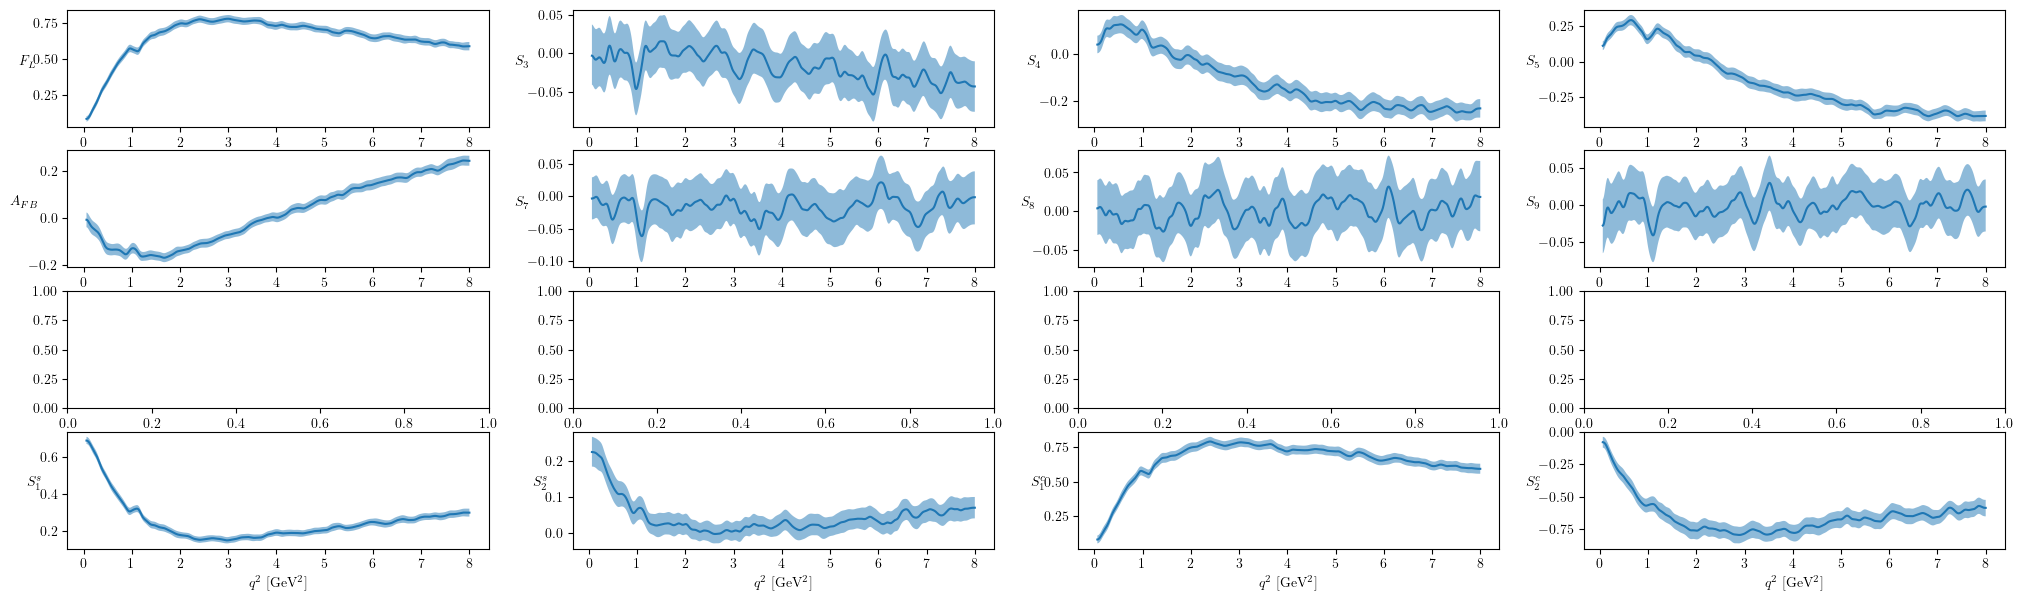

In [127]:
# Plot the Si basis observables with uncertainties from bootstrapping
fig, ax = plt.subplots(nrows=4, ncols=4, figsize = (25,7))
print(mean_vals.keys())
_i = 0
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        if _obs in ['M1s', 'M1c', 'M2s', 'M2c']:
            _i+=1
            continue
        _col.plot(T, gaussian_filter1d(mean_vals[_obs], sigma=50))
        _col.fill_between(T.reshape(10000), gaussian_filter1d(lower_vals[_obs], sigma=50), gaussian_filter1d(upper_vals[_obs], sigma=50), alpha = 0.5)
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _i += 1

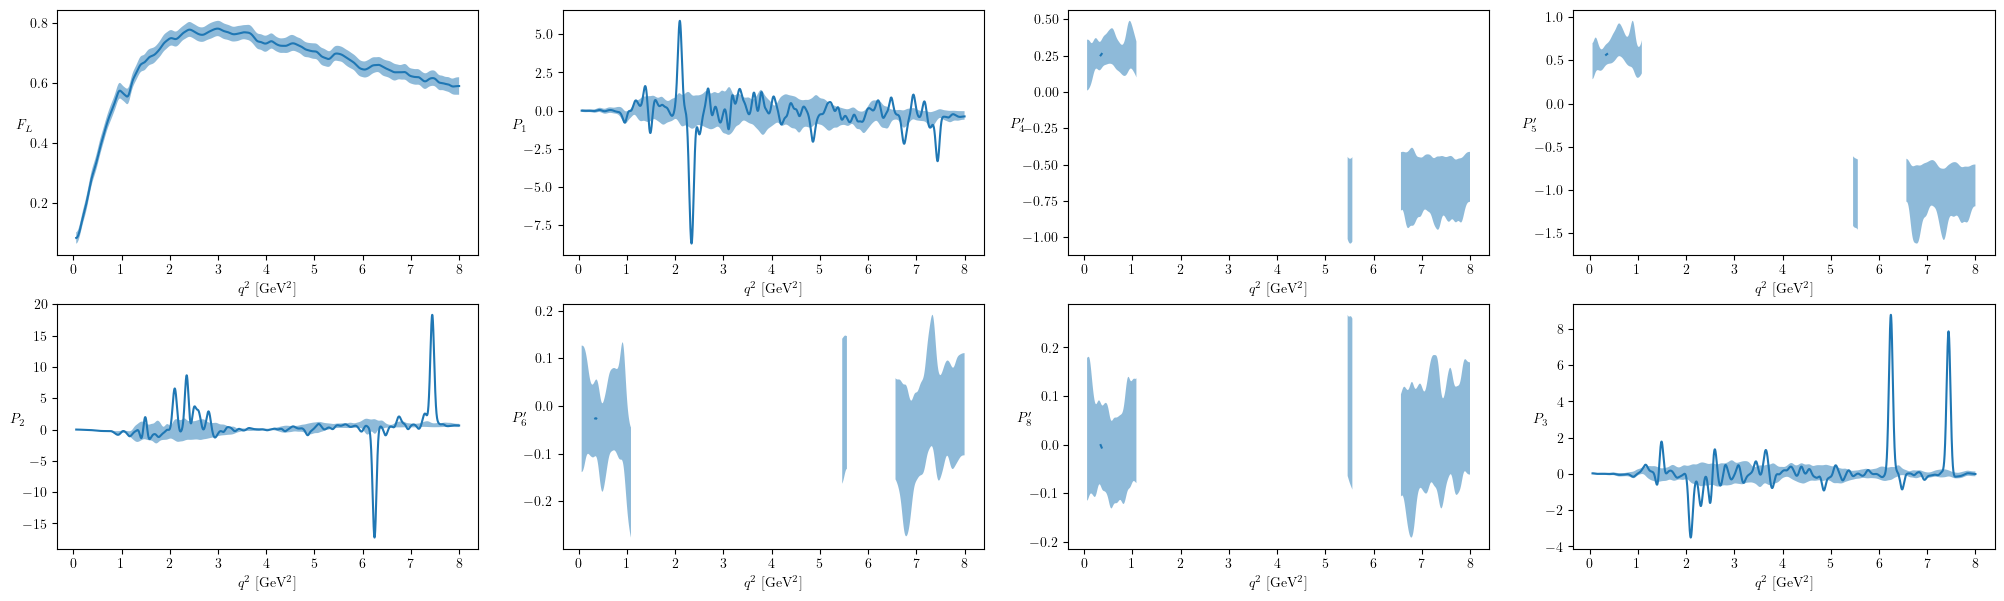

In [117]:
# Plot the Pi basis with uncertainties from bootstrapping
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        if _obs in ['M1s', 'M1c', 'M2s', 'M2c']:
            continue
        _optObs = optimisedObsTranslator[_obs]     
        _col.plot(T, gaussian_filter1d(p_mean_vals[_optObs], sigma=50))
        _col.fill_between(T.reshape(10000), gaussian_filter1d(p_lower_vals[_optObs], sigma=50), gaussian_filter1d(p_upper_vals[_optObs], sigma=50), alpha = 0.5)
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[optimisedObsTranslator[_obs]], rotation=0)
        _i += 1

In [77]:
# Some ratios for Quim
mb = 4.8
mB = 5.25
mbh = 4.8/5.25
mB2 = mB**2
q2arr = T.reshape(10000)
sh = q2arr/mB2
p_arr = {}
for _obs in optObsList:
    p_arr[_obs] = np.array(p_mean_vals[_obs])

z = 4.*p_arr['P2']**2 - 8.*p_arr['P2']*p_arr['P4p']*p_arr['P5p'] + p_arr['P5p']**2
A_B = 8.*0.892*0.892*sh/((1. - sh)**2)


c9_c7_ratio = -(mb/mB)*(1 + (p_arr['P5p']*(sh - 1.))/(np.sqrt(my_sqrt)) + sh )
c9_c7_ratio /= sh

ff_ratio = np.sqrt((p_arr["FL"]/(1.-p_arr[   "FL"])) * A_B * ((p_arr["P5p"] + z)**2/(p_arr["P2"]**2)))
ff_ratio *= (1./np.sqrt(2))

/tmp/ipykernel_561193/2077214064.py:16: RuntimeWarning: invalid value encountered in sqrt
  c9_c7_ratio = -(mb/mB)*(1 + (p_arr['P5p']*(sh - 1.))/(np.sqrt(my_sqrt)) + sh )


[0.06       0.06079408 0.06158816 ... 3.23393539 3.23472947 3.23552355]
[nan nan nan ... nan nan nan]


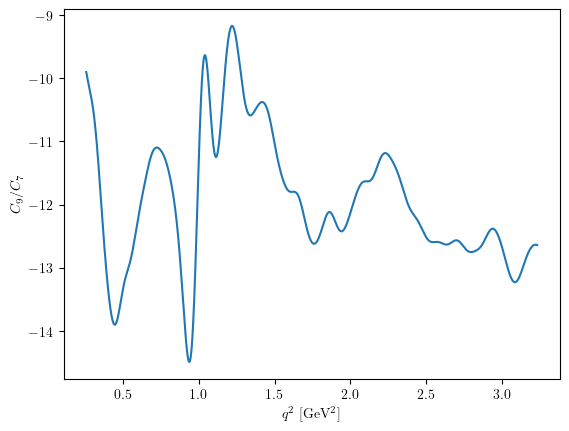

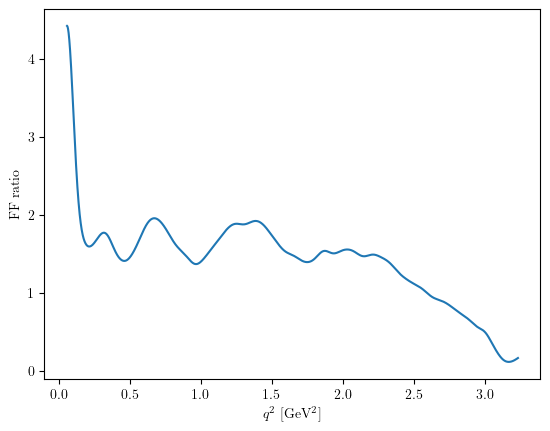

In [80]:
plt.figure()
plt.plot(q2arr.reshape(10000)[:4000], gaussian_filter1d(c9_c7_ratio, sigma=50)[:4000])
plt.xlabel("$q^{2}$ [GeV$^{2}$]")
plt.ylabel("$C_{9}/C_{7}$")

plt.figure()
plt.plot(q2arr.reshape(10000)[:4000], gaussian_filter1d(ff_ratio, sigma=50)[:4000])
plt.xlabel("$q^{2}$ [GeV$^{2}$]")
plt.ylabel("FF ratio")
print(q2arr.reshape(10000)[:4000])
print( gaussian_filter1d(c9_c7_ratio, sigma=50))

In [82]:
# Set up a BallTree to efficiently find nearest neighbours
from sklearn.neighbors import BallTree 
tree = BallTree(np.array(tsample['q2']).reshape(30000,1), leaf_size=2)
# Get a list of neighbour indices from our vector of q2 values. This is for use in the variance calculations
dist, ind = tree.query(T, k=400)

In [83]:
def neighbour_range(indices):
    rs = tsample.iloc[indices[0]]
    trange = max(rs["q2"]) - min(rs["q2"])
    return trange

In [84]:
# Make an estimate of the mean effective bin width
range_list = []
for _q2 in np.linspace(0.06,8.0,100):
    dist, _ind = tree.query([[_q2]], k=n_neighbours)
    range_list.append(neighbour_range(_ind))
print("Mean width: %.4f" % np.mean(range_list))

Mean width: 0.2378


In [85]:
# Add in the uncertainties
for _obs in obsList:
    mean_vals[f"err_{_obs}"] = []
mean_vals = moments.calculateAllVariances(tsample, ind, mean_vals, n_neighbours)

In [86]:
# For comparison with the run 1+2 binned analysis
current = {
    'S2c' : [-0.2305, -5.33e-9/9.59e-9 ,-4.4444292e-08/6.17831e-8, -5.0072838e-08/6.29868e-8 , -6.8838896e-08/9.41826e-8, -0.6444],
    'S3' : [0.002696, -3.455e-10/9.59e-9 ,0.0089049437, -0.0085131542, -0.023252104, -0.03862],
    'S4' : [0.09283, 1.229e-9/9.59e-9 ,-0.010349509, -0.13171753, -0.21123314, -0.2504],
    'S5' : [0.2352, 1.38e-9/9.59e-9 , 6.9419e-9/6.17831e-8, -9.46732e-9/6.29868e-8, -2.94643e-8/9.41826e-8,-0.3923],
    'AFB' : [-0.08999, -0.75*1.54e-9/9.59e-9 ,-0.1802, -0.07505, 0.07095, 0.2049],
    'S7' : [-0.02248, -7.9e-10/9.59e-9 , -0.016736809, -0.012995330, -0.013370855,-0.02112],
    'S8' : [-0.006793, 1.36e-10/9.59e-9 , -0.0038672801, -0.0035376542, -0.0016877821, -0.001743],
    'S9' : [0.0009881, -4.84e-10/9.59e-9 ,  -0.0038677392, -0.00098096590, 0.00050010764, 0.003569],
    'FL' : [0.2305,  5.33e-9/9.59e-9 , 4.4444292e-08/6.17831e-8, 5.0072838e-08/6.29868e-8 , 6.8838896e-08/9.41826e-8, 0.6444]
}
current_err = {
    'S2c' : [0.089, 0.089, 0.02178, 0.01954, 0.01597, 0.015],
    'FL' : [0.089, 0.089, 0.02178, 0.01954, 0.01597, 0.015],
    'S3' : [0.028, 0.028, 0.02416, 0.02357, 0.01945, 0.019],
    'S4' : [0.033, 0.033, 0.03483, 0.03295, 0.02402, 0.024],
    'S5' : [0.028, 0.028, 0.03241, 0.03179, 0.02374, 0.023],
    'AFB' : [0.020, 0.020, 0.0197, 0.01717, 0.01403, 0.014],
    'S7' : [0.025, 0.025, 0.03268, 0.0327, 0.02602, 0.026],
    'S8' : [0.028, 0.028, 0.03516, 0.03383, 0.02633, 0.026],
    'S9' : [0.025, 0.025, 0.02404, 0.02353, 0.01952, 0.019]
}
current_q2_centre = [0.52, 1.0404, 1.8, 3.25, 5.0, 7.0]
current_q2_width = [0.46, 0.002, 0.7, 0.75, 1.0, 1.0]

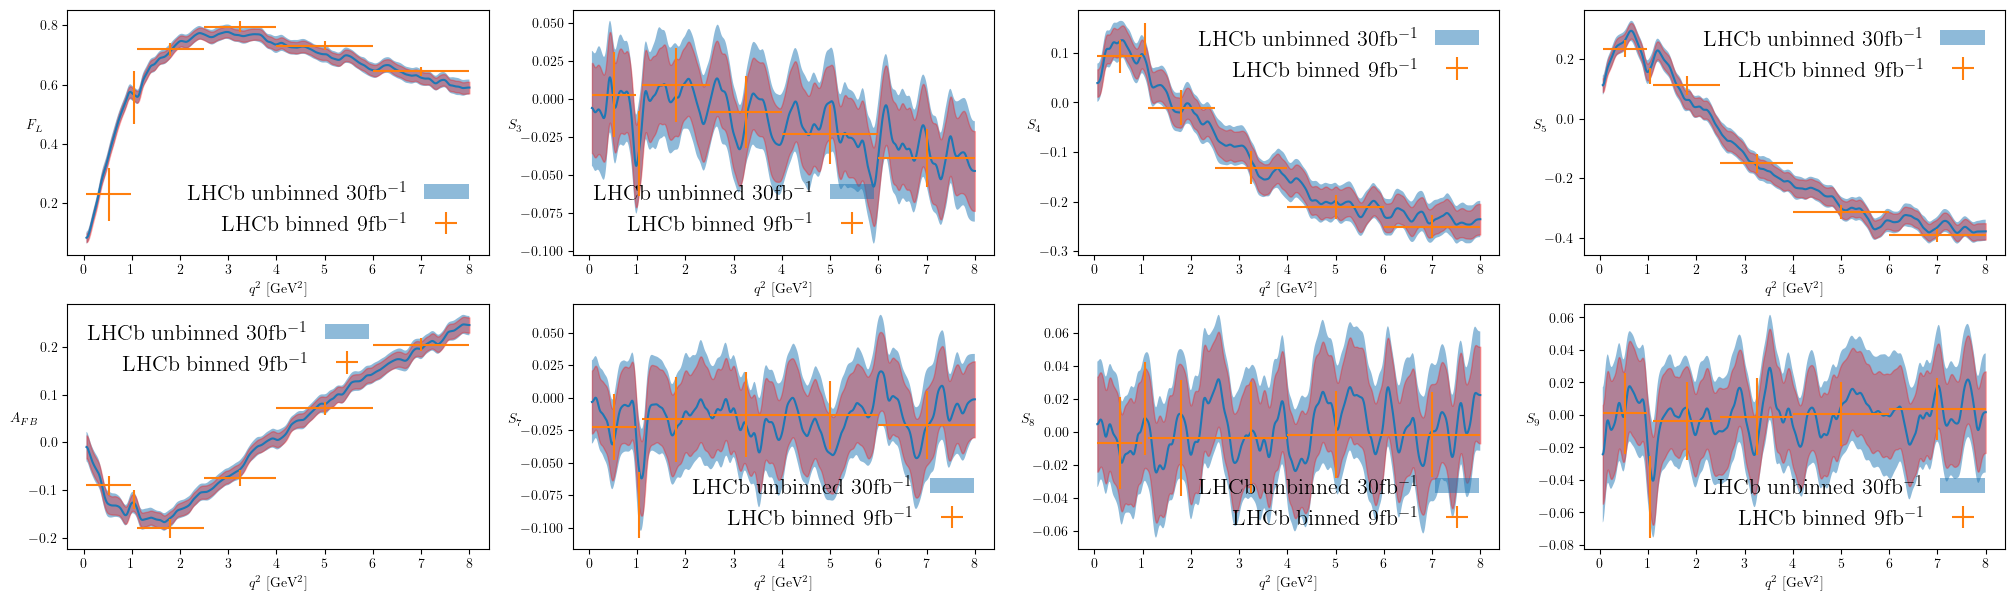

In [87]:
# Plot a comparison with the Run 1 + 2 and also compare the uncertainty bands from bootstrapping and the second order moments
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (25,7))
_i = 0
for _row in ax:
    for _col in _row:
        _obs = obsList[_i]
        _col.plot(T, gaussian_filter1d(mean_vals[_obs], sigma=50))
        _col.fill_between(T.reshape(10000), gaussian_filter1d(lower_vals[_obs], sigma=50), gaussian_filter1d(upper_vals[_obs], sigma=50), alpha = 0.5, label = 'LHCb unbinned 30fb$^{-1}$')
        _col.errorbar(current_q2_centre, current[_obs], yerr = current_err[_obs], xerr = current_q2_width, label = 'LHCb binned 9fb$^{-1}$', linestyle = '')
        _col.fill_between(T.reshape(10000), gaussian_filter1d(np.array(mean_vals[_obs]) - np.array(mean_vals[f"err_{_obs}"]), sigma=50),
                          gaussian_filter1d(np.array(mean_vals[f"err_{_obs}"]) + np.array(mean_vals[_obs]), sigma=50) , alpha=0.3, color = 'r')
        _col.set_xlabel("$q^{2}$ [GeV$^{2}$]")
        _col.set_ylabel(obs_to_label[obsList[_i]], rotation=0)
        _col.legend(fontsize=16, frameon=False, markerfirst=False)
        _i += 1

In [28]:
import json
with open('means.json', 'w') as fp:
    json.dump(mean_vals, fp)
with open('sigmas.json', 'w') as fp:
    json.dump(sigma_vals, fp)

In [29]:
filtered_unbins

{'FL': {0: array([0.6041261 , 0.60412682, 0.60412824, ..., 0.68727171, 0.68727201,
         0.68727215]),
  1: array([0.56802912, 0.56802933, 0.56802975, ..., 0.68083782, 0.68083989,
         0.68084092]),
  2: array([0.59623191, 0.59623278, 0.59623451, ..., 0.70070283, 0.7007033 ,
         0.70070353]),
  3: array([0.58796138, 0.58796212, 0.58796362, ..., 0.64000836, 0.64000756,
         0.64000716]),
  4: array([0.59682925, 0.5968294 , 0.59682969, ..., 0.66464761, 0.66464809,
         0.66464833]),
  5: array([0.54147568, 0.54147745, 0.54148097, ..., 0.67585817, 0.67585909,
         0.67585955]),
  6: array([0.60249078, 0.60249086, 0.60249103, ..., 0.67941859, 0.6794184 ,
         0.67941831]),
  7: array([0.6217781 , 0.62177859, 0.62177958, ..., 0.67647037, 0.67647111,
         0.67647148]),
  8: array([0.5873746 , 0.5873754 , 0.58737699, ..., 0.68855078, 0.68855063,
         0.68855056]),
  9: array([0.60075532, 0.60075557, 0.60075605, ..., 0.63413936, 0.63413901,
         0.634138

In [30]:
s5_point_10 = [filtered_unbins['S5'][_s][10] for _s in range(200)]
s5_point_100 = [filtered_unbins['S5'][_s][100] for _s in range(200)]
s4_point_10 = [filtered_unbins['S4'][_s][10] for _s in range(200)]
s4_point_100 = [filtered_unbins['S4'][_s][100] for _s in range(200)]

In [31]:
np.cov([s5_point_10,s5_point_100, s4_point_10, s4_point_100])

array([[ 0.00133167,  0.00126441, -0.000213  , -0.00020019],
       [ 0.00126441,  0.00120766, -0.00019816, -0.00018734],
       [-0.000213  , -0.00019816,  0.00140309,  0.00130983],
       [-0.00020019, -0.00018734,  0.00130983,  0.00123028]])

In [32]:
points = {}
for _v in obsList:
    points[_v] = {}
    for _p in range(10000):
        points[_v][_p] = [filtered_unbins[_v][_s][_p] for _s in range(200)]

In [33]:
points.keys()

dict_keys(['FL', 'S3', 'S4', 'S5', 'AFB', 'S7', 'S8', 'S9'])

In [34]:
np.corrcoef([points['S5'][_v] for _v in [1,100,1000,5000,9000]])

array([[ 1.        ,  0.99698724,  0.0168435 ,  0.01818816, -0.05323095],
       [ 0.99698724,  1.        ,  0.01770344,  0.02211616, -0.04708251],
       [ 0.0168435 ,  0.01770344,  1.        ,  0.07605214, -0.08815088],
       [ 0.01818816,  0.02211616,  0.07605214,  1.        , -0.1592949 ],
       [-0.05323095, -0.04708251, -0.08815088, -0.1592949 ,  1.        ]])

In [35]:
with open('covs.json', 'w') as fp:
    json.dump(points, fp)

In [36]:
to_calculate = {}
for _v in obsList:
    for _p in range(0,10000,100):
        to_calculate["%s_%s" % (_v,_p)] = points[_v][_p]
for_cov = pd.DataFrame(to_calculate)

In [71]:
for_cov

,FL_0,FL_100,FL_200,FL_300,FL_400,FL_500,FL_600,FL_700,FL_800,FL_900,...,S9_9000,S9_9100,S9_9200,S9_9300,S9_9400,S9_9500,S9_9600,S9_9700,S9_9800,S9_9900
0,0.604126,0.607558,0.616211,0.627092,0.638569,0.650709,0.663515,0.676120,0.687773,0.698548,...,-0.021141,-0.010102,0.004334,0.016907,0.023036,0.021932,0.017415,0.014587,0.015406,0.017931
1,0.568029,0.569052,0.571941,0.576993,0.586162,0.602277,0.625702,0.652129,0.675259,0.692063,...,-0.010653,-0.011424,-0.013600,-0.015219,-0.014961,-0.013336,-0.011860,-0.011571,-0.012331,-0.013274
2,0.596232,0.600313,0.609448,0.618689,0.627842,0.641735,0.663583,0.689811,0.712485,0.726068,...,0.032624,0.043392,0.047182,0.041970,0.028957,0.010997,-0.008392,-0.025434,-0.037269,-0.043373
3,0.587961,0.591552,0.600352,0.610307,0.618747,0.626429,0.635794,0.647837,0.661670,0.676358,...,0.014405,0.001379,-0.013860,-0.021770,-0.015012,0.005453,0.032264,0.058277,0.079561,0.093767
4,0.596829,0.597691,0.601513,0.610396,0.624300,0.640196,0.654259,0.664637,0.671991,0.677827,...,-0.006622,-0.006076,-0.000673,0.006756,0.011669,0.012245,0.010264,0.007867,0.005457,0.003170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.589374,0.591427,0.596155,0.601892,0.610160,0.624385,0.645140,0.668455,0.689233,0.704959,...,-0.062867,-0.050622,-0.028506,-0.004238,0.015925,0.028403,0.032648,0.030861,0.026654,0.023122
196,0.578278,0.584405,0.600050,0.619654,0.638962,0.657022,0.674757,0.692781,0.710572,0.726555,...,-0.014119,-0.010126,-0.007862,-0.007538,-0.006513,-0.001260,0.009101,0.021553,0.031721,0.037384
197,0.589742,0.594316,0.605610,0.618958,0.631904,0.646103,0.664300,0.685668,0.705238,0.718474,...,-0.036566,-0.043586,-0.039725,-0.026148,-0.009102,0.005140,0.012672,0.011501,0.002478,-0.008707
198,0.622400,0.623788,0.627711,0.633767,0.641591,0.650630,0.659813,0.667789,0.673857,0.679022,...,-0.028796,-0.018576,-0.003282,0.009291,0.013944,0.010753,0.001989,-0.011136,-0.027192,-0.041493


In [38]:
correlation_matrix = for_cov.corr()
correlation_matrix.to_json("correlation_matrix.json", indent = 4)

In [39]:
covariance_matrix = for_cov.cov()
covariance_matrix.to_json("covariance_matrix.json", indent = 4)

In [40]:
smoothed_mean_vals = {}
smoothed_sigma_vals = {}
for _o in obsList:
    smoothed_mean_vals[_o] = gaussian_filter1d(mean_vals[_o], sigma=200)
    smoothed_sigma_vals[_o] = gaussian_filter1d(sigma_vals[_o], sigma=200)

In [79]:
q2frame = pd.DataFrame(T.reshape(10000)[::100])

In [80]:
q2frame.to_json("q2_points.json", indent = 4)

In [87]:
meanframe = pd.DataFrame(mean_vals)

In [95]:
meanframe["q2"] = T.reshape(10000)
meanframe[::100]
meanframe[::100].to_json("q2_points.json", indent=4)